In [7]:
import configparser
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import sys
sys.path.append('..')
sys.path.append('../..')

from data.data_util import cluster_data, plot_difference_gender_age

config = configparser.ConfigParser()
config.read("../../config.ini")

['../../config.ini']

In [8]:
dataset = 'nih'
id = "4c26f705-c835-438c-9dc5-e66dbb27ad00"

In [9]:
# Load pca
pca = np.load(f"{config['general']['experiment_dir']}/{id}/pca_{dataset}_{id}.npy")
tsne = np.load(f"{config['general']['experiment_dir']}/{id}/tsne_{dataset}_{id}.npy")

# Load cluster
labels_pca = np.load(f"{config['general']['experiment_dir']}/{id}/labels_{dataset}_pca_{id}.npy")
labels_tsne = np.load(f"{config['general']['experiment_dir']}/{id}/labels_{dataset}_tsne_{id}.npy")

In [10]:
# Load data
data = pd.read_csv(f"{config[dataset]['labels']}")
data = cluster_data(data, id, 10, 10, dataset_name=dataset, tsne=tsne, pca=pca, cluster_type='spectral')
len(data)

KeyError: 'general'

# Gender distribuiton

In [5]:
if dataset == 'nih':
    column_gender = 'Patient Gender'
    column_age = 'Patient Age'
elif dataset == 'chexpert':
    column_gender = 'Sex'
    column_age = 'Age'
data[column_gender].value_counts()

Patient Gender
M    1346
F    1152
Name: count, dtype: int64

<Axes: ylabel='count'>

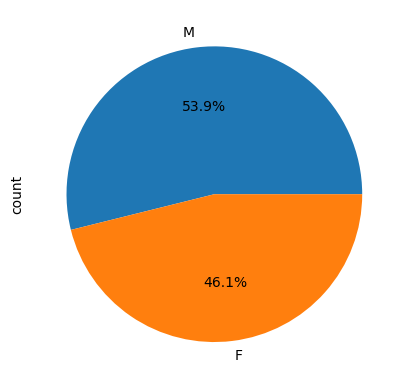

In [6]:
data[column_gender].value_counts().plot.pie(autopct='%1.1f%%')

# Gender and age

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

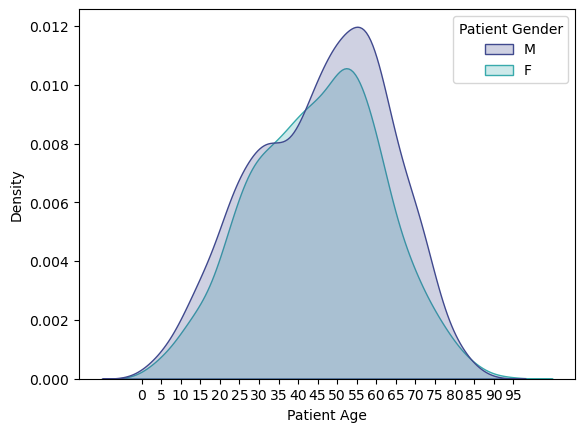

In [7]:
plot_difference_gender_age(data, dataset='nih')

# Sampled data

In [10]:
image_per_cluster_pca = int(len(data)*0.3)//10
image_per_cluster_tsne = int(len(data)*0.3)//10
image_per_cluster_tsne, image_per_cluster_pca

(74, 74)

In [26]:
sampled_df_pca = data.groupby('cluster_id_pca').apply(lambda x: x.sample(len(x)) if len(x) <= 10 else x.sample(n=10))
sampled_df_tsne = data.groupby('cluster_id_tsne').apply(lambda x: x.sample(len(x)) if len(x) <= 10 else x.sample(n=10))

## Gender distribuiton

In [27]:
sampled_df_pca[column_gender].value_counts()

Patient Gender
F    6
M    4
Name: count, dtype: int64

<Axes: ylabel='count'>

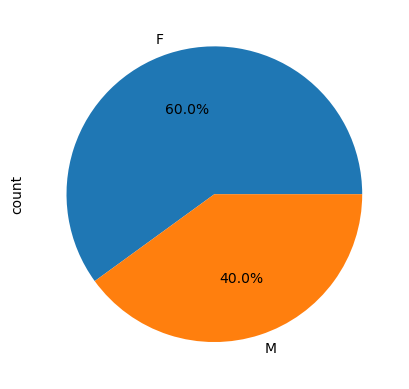

In [28]:
sampled_df_pca[column_gender].value_counts().plot.pie(autopct='%1.1f%%')

In [30]:
sampled_df_tsne[column_gender].value_counts()

Patient Gender
F    48
M    36
Name: count, dtype: int64

<Axes: ylabel='count'>

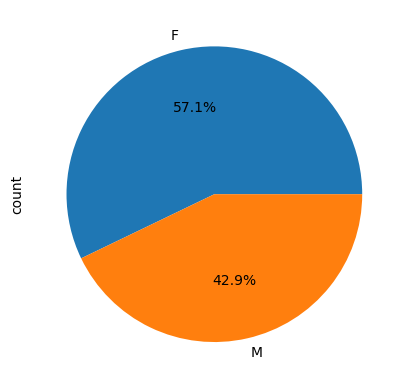

In [31]:
sampled_df_tsne[column_gender].value_counts().plot.pie(autopct='%1.1f%%')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

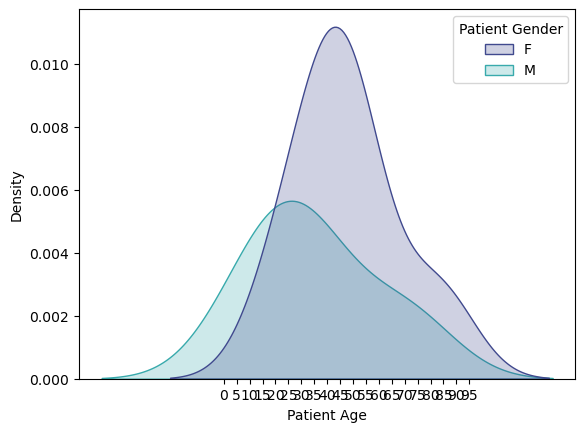

In [32]:
plot_difference_gender_age(sampled_df_pca, dataset='nih')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

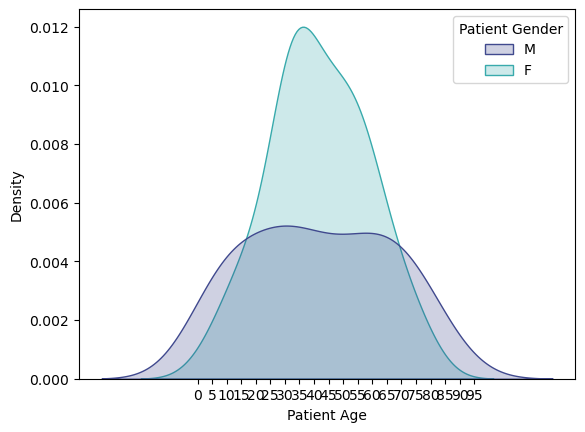

In [33]:
plot_difference_gender_age(sampled_df_tsne, dataset='nih')

# Random Sample

In [21]:
random_sampled = data.sample(int(len(data)*0.3))

In [22]:
random_sampled[column_gender].value_counts()

Patient Gender
M    408
F    341
Name: count, dtype: int64

<Axes: ylabel='count'>

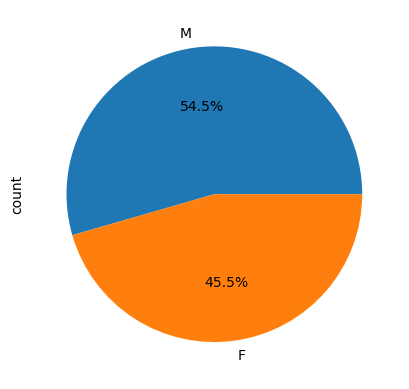

In [23]:
random_sampled[column_gender].value_counts().plot.pie(autopct='%1.1f%%')

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

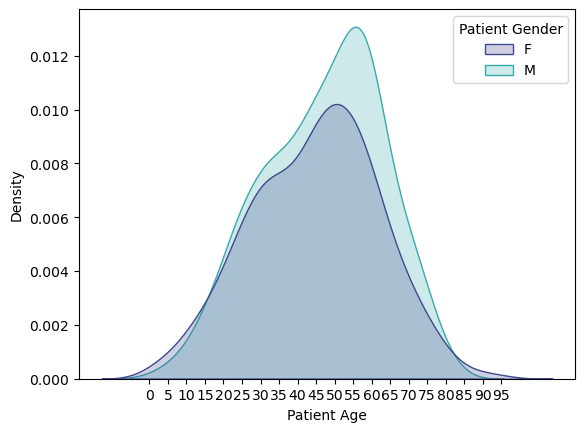

In [24]:
plot_difference_gender_age(random_sampled, dataset='nih')

# 100 sample per label

In [25]:
sicknesses = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'No Finding']

selected_images = []

for sickness in sicknesses:
    data_sickness = data[data['Finding Labels'].str.contains(sickness)]
    sampled_images = data.groupby(['cluster_id_tsne']).apply(lambda x: x.sample(n=10))
    
    selected_images.append(sampled_images)

# Concatenar todos os DataFrames selecionados
selected_images_df = pd.concat(selected_images)

plot_difference_gender_age(selected_images_df, dataset='nih')

ValueError: Cannot take a larger sample than population when 'replace=False'

/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/opt/homebrew/Caskroom/miniconda/base/envs/fairness/lib/python3.11/site-packages/seaborn/_oldcore.py:1498: FutureWarni

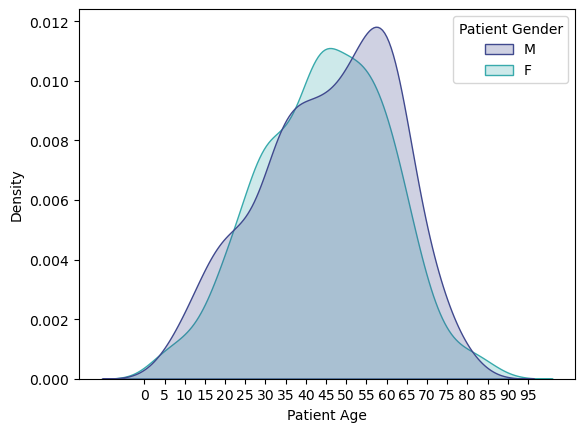

In [123]:
sicknesses = ['Atelectasis', 'Cardiomegaly', 'Consolidation', 'Edema', 'Effusion', 'No Finding']

selected_images = []

for sickness in sicknesses:
    data_sickness = data[data['Finding Labels'].str.contains(sickness)]
    sampled_images = data.sample(n=230)
    
    selected_images.append(sampled_images)

# Concatenar todos os DataFrames selecionados
selected_images_df = pd.concat(selected_images)

# Gender and age
plot_difference_gender_age(selected_images_df, dataset='nih')